#  XAI BERT-


**Autora:** Antonia Estefane Ribeiro Veras

**Orientador:** Adonias Caetano de Oliveira

**Instituição:** IFCE

**Dataset disponível em:**


## Instalação de Pacotes

In [ ]:
!pip install Unidecode

In [ ]:
!pip install wordcloud

In [ ]:
#hide
!pip install transformers

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=6963ee8acc9f5d2568ad83ec1cc734dd262aafe4c19c6424e06bc2838a7ec61e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


## Importação de Bibliotecas

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from lime.lime_text import LimeTextExplainer

In [ ]:
#text preprocessing libraries
import pandas as pd
import re
from unidecode import unidecode
from string import punctuation
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#text classification libraries
from transformers import BertTokenizer, BertForSequenceClassification
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from scipy.special import expit


In [ ]:
from google.colab import drive

## Montagem do Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento do Dataset

In [ ]:

dataset = pd.read_csv('/content/drive/MyDrive/datasets/combined.csv')
#dataset = dataset[['selftext_clean', 'is_suicide']]
dataset = dataset.rename(columns={'selftext_clean': 'text', 'is_suicide': 'class'})

dataset.head(10)


,text,class
0,hi really know phrase situation try life reall...,0
1,depressed past couple week ever since got back...,1
2,hi know else go devastated right feeling like ...,0
3,shit like get better everyone purpose need fin...,1
4,wish wa prettier wish feel like burden wish br...,0
5,weird question someplace call talk someone go ...,1
6,venting void feel bad constantly annoying frie...,0
7,hey guy last week went roughest day ocd ha eve...,0
8,know pas know many people know care want say p...,1
9,fighting depression couple year ha uphill batt...,0


## Pré-Processamento

In [ ]:
nltk.download('rslp')
nltk.download('stopwords')
stopwords_list = stopwords.words("english")
print(stopwords_list)

[nltk_data] Downloading package rslp to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_process = dataset.copy()

In [ ]:
import re
from unidecode import unidecode

old_texts = data_process["text"]
new_texts = []


for text in old_texts:
    if isinstance(text, str):  # Verifica se text é uma string
        text = re.sub('@[^\s]+', '', text)
        text = unidecode(text)
        text = re.sub('<[^<]+?>','', text)

    else:
        text = str(text)  # Converte para string
        text = re.sub('@[^\s]+', '', text)
        text = unidecode(text)
        text = re.sub('<[^<]+?>','', text)



In [ ]:
data_process

,text,class
0,hi really know phrase situation try life reall...,0
1,depressed past couple week ever since got back...,1
2,hi know else go devastated right feeling like ...,0
3,shit like get better everyone purpose need fin...,1
4,wish wa prettier wish feel like burden wish br...,0
...,...,...
1880,wanna live anymore yeah,0
1881,learned life fucking sad sometimes start think...,0
1882,nothing ha gotten better tried hard gotten wor...,1
1883,first time going course recently hit really ha...,0


## Visualização dos Dados

<Axes: xlabel='class', ylabel='count'>

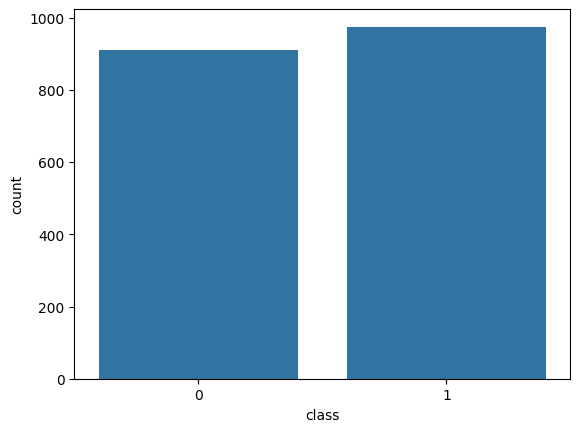

In [ ]:
sns.countplot(x = data_process['class'])

### Balanceamento dos Dados



<Axes: xlabel='class', ylabel='count'>

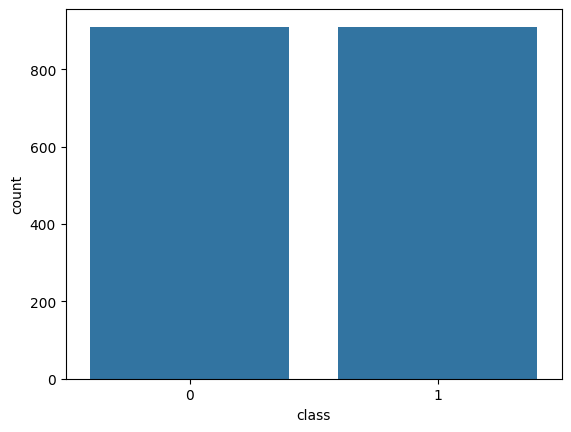

In [ ]:
rus = RandomUnderSampler(random_state= 0)
X_bal, Y_bal = rus.fit_resample(data_process[['text']], data_process['class'])
sns.countplot(x = Y_bal)

### Criação da Wordcloud

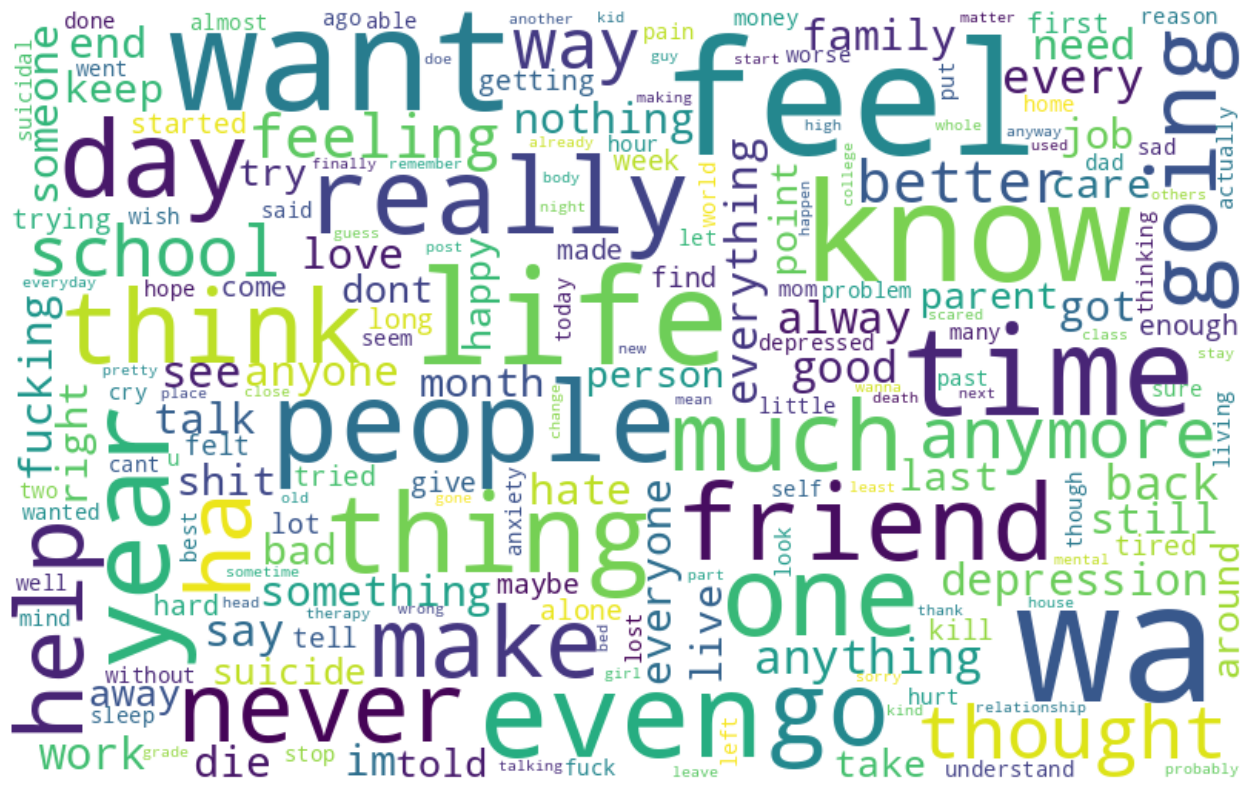

In [ ]:
new_texts = data_process["text"]
all_words = ' '.join([str(text) for text in new_texts if isinstance(text, str)])
word_cloud = WordCloud(width= 800, height= 500, max_font_size = 110, background_color="white", collocations = False).generate(all_words)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Divisão dos Dados em Conjuntos de Treinamento, Validação

In [ ]:
# Dividir o dataset em conjunto de treinamento e validação
train_df, valid_df, train_label, valid_label = train_test_split(X_bal, Y_bal, test_size=0.20, random_state=42)


## Inicialização do Tokenizador e do Modelo

In [ ]:
PRETRAINED_LM = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_LM, do_lower_case=True)
tokenizer

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

## Definição de Funções Auxiliares

In [ ]:
def encode(docs):
    '''
    This function takes list of texts and returns input_ids and attention_mask of texts
    '''
    encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=128, padding='max_length',
                            return_attention_mask=True, truncation=True, return_tensors='pt')
    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']
    return input_ids, attention_masks

## Preparação dos dados para o treinamento do modelo

In [ ]:
train_input_ids, train_att_masks = encode(train_df['text'].values.tolist())
valid_input_ids, valid_att_masks = encode(valid_df['text'].values.tolist())

In [ ]:
import torch
train_y = torch.LongTensor(train_label.values)
valid_y = torch.LongTensor(valid_label.values)
train_y.size(),valid_y.size()

(torch.Size([1456]), torch.Size([364]))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 16
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

valid_dataset = TensorDataset(valid_input_ids, valid_att_masks, valid_y)
valid_sampler = SequentialSampler(valid_dataset)
valid_dataloader = DataLoader(valid_dataset, sampler=valid_sampler, batch_size=BATCH_SIZE)


In [ ]:
train_label.unique()

array([0, 1])

In [ ]:
from transformers import BertForSequenceClassification
N_labels = len(train_label.unique())
model = BertForSequenceClassification.from_pretrained(PRETRAINED_LM,
                                                      num_labels=N_labels,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model.to(device)


In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

# Best results: 07 and 08
EPOCHS = 4
LEARNING_RATE = 2e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer,
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

## Treinamento do modelo

In [ ]:
#collapse-output
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))


    '''
    Validation
    '''
    model.eval()
    valid_loss = 0
    valid_pred = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(valid_dataloader,desc='Validation')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            valid_loss += loss.item()

            valid_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))

    val_loss_per_epoch.append(valid_loss / (step_num_e + 1))
    valid_pred = np.concatenate(valid_pred)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train_df) / BATCH_SIZE), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(valid_df) / BATCH_SIZE), valid_loss / (step_num_e + 1)))

Epoch:  1


Training:   0%|          | 0/91 [00:00<?, ?it/s]

Validation:   0%|          | 0/23 [00:00<?, ?it/s]

91/91 train loss: 0.17884332293665017 
23/23 val loss: 0.9485590069190316 
Epoch:  2


Training:   0%|          | 0/91 [00:00<?, ?it/s]

Validation:   0%|          | 0/23 [00:00<?, ?it/s]

91/91 train loss: 0.15934821695171214 
23/23 val loss: 0.9990517134251802 
Epoch:  3


Training:   0%|          | 0/91 [00:00<?, ?it/s]

Validation:   0%|          | 0/23 [00:00<?, ?it/s]

91/91 train loss: 0.13590330585509866 
23/23 val loss: 1.021025502163431 
Epoch:  4


Training:   0%|          | 0/91 [00:00<?, ?it/s]

Validation:   0%|          | 0/23 [00:00<?, ?it/s]

91/91 train loss: 0.13917947145035633 
23/23 val loss: 1.0205438577610513 


## Avaliação do Modelo

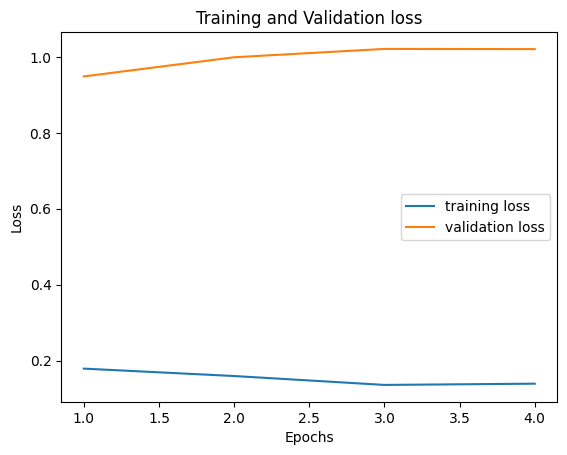

In [ ]:
from matplotlib import pyplot as plt
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, val_loss_per_epoch, label = 'validation loss' )
ax.set_title('Training and Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('classifiation report')
print(classification_report(valid_pred, valid_label.to_numpy()))


classifiation report
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       191
           1       0.63      0.66      0.65       173

    accuracy                           0.65       364
   macro avg       0.65      0.65      0.65       364
weighted avg       0.66      0.65      0.65       364



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

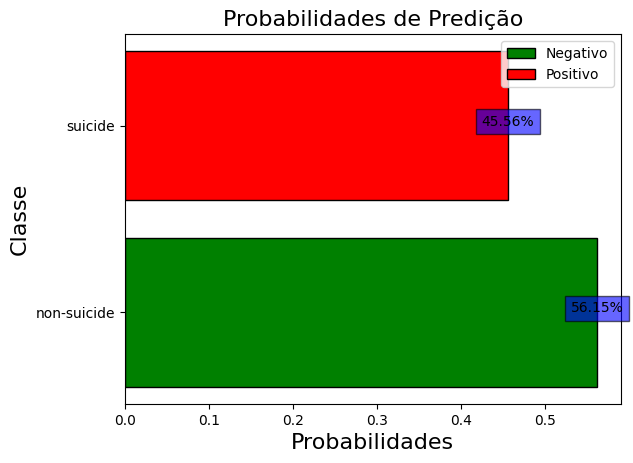

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(y[i], i, str(f'{y[i]*100:0.2f}%'), ha='center', bbox=dict(facecolor='blue', alpha=.6))

plt.clf()

pos = np.arange(len(df['Label'].values))
probabilidades = df['Probabilidade'].values

# Definir as cores para cada classe
colors = df['Label'].map({'non-suicide': 'g', 'suicide': 'r'})

# Criar o gráfico de barras
fig = plt.barh(pos, probabilidades, color=colors, edgecolor='black')
plt.yticks(pos, df['Label'])  # Exibir cada classe no eixo y
plt.legend(fig, [str(i) for i in ['Negativo', 'Positivo']])  # Exibir a legenda de cada classe (Positivo ou Negativo)
plt.xlabel('Probabilidades', fontsize=16)
plt.ylabel('Classe', fontsize=16)
addlabels(pos, probabilidades)  # Chamar a função para adicionar rótulos de valores
plt.title('Probabilidades de Predição', fontsize=16)
plt.show()


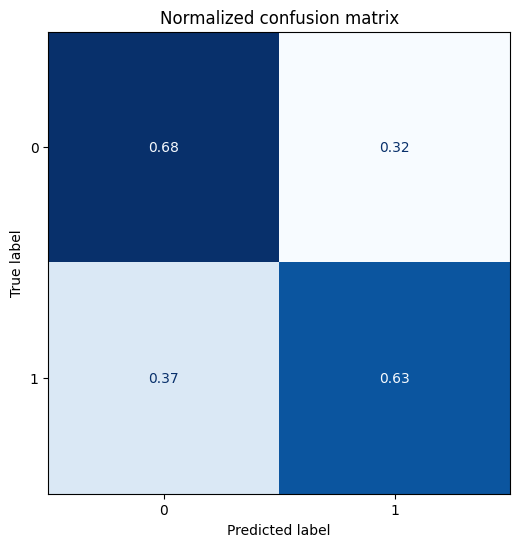

In [ ]:
plot_confusion_matrix(valid_pred,valid_label.to_numpy())

In [ ]:
# Lista de frases para teste
frases_teste = [
    'feeling sick anxious need help please',
    'doe anyone know specific name cleaning product mix kill oneself',
    'assume death virus something else would le suicidal',
    'want disappear painlessly',
    'suffering humiliation worrying future bad im coward wanna die bad',
    'always feel happy whole get one dont make even sad feel like something wrong',
    'literally care anything else want happy',
    'cheer celebrating another day packed activity sleeping lot wanting anything interested anything staring ceiling watching paint dry',
    'win depression',
    'today first appointment psychologist know going work might give ha worked'
]

## Interpretabilidade do Modelo com Lime

In [ ]:
def createDataloader(text):
  test_input_ids, test_att_masks = encode([text])
  BATCH_SIZE = 16
  test_y = torch.LongTensor([0])
  test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
  test_sampler = SequentialSampler(test_dataset)
  test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)
  return test_dataloader

In [ ]:
def predict_proba(sentences):
  model.eval()
  probabilities = []

  test_input_ids, test_att_masks = encode(sentences)
  BATCH_SIZE = 16
  test_y = torch.LongTensor([0] * len(sentences))
  test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
  test_sampler = SequentialSampler(test_dataset)
  test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

  with torch.no_grad():
    for step_num, batch_data in tqdm(enumerate(test_dataloader)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        probabilities.append(expit(output.logits.cpu().detach().numpy()))

  probabilities = np.concatenate(probabilities)

  return probabilities

In [ ]:
labels_names = ['non-suicide', 'suicide']
# Loop sobre as frases de teste
for frase in frases_teste:
    # Gerando a explicação Lime para a frase atual
    exp = explainer.explain_instance(frase, classifier_fn=predict_proba, num_features=10)
    # Mostrando a explicação no console
    print("Frase:", frase)
    exp.show_in_notebook(text=True)
    print("\n")

Output hidden; open in https://colab.research.google.com to view.